In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use("bmh")

([<matplotlib.axis.XTick at 0x7ff4f74b1010>,
 [Text(0.005454491360845425, 0, '0.0054'),
  Text(0.0062499186216989615, 0, '0.0062'),
  Text(0.0074998593797459025, 0, '0.0074')])

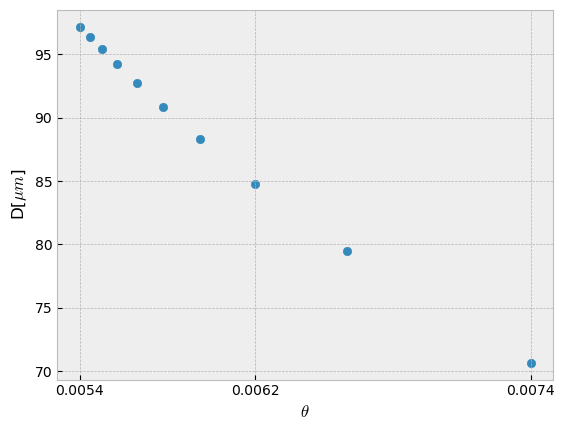

In [2]:
# PELO 1
d_1 = np.array([220, 200, 180, 160, 140, 120, 100, 80, 60, 40])*0.01 #en metros
L_1 = np.array([1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3])*0.01 #en metros

#Ángulos PELO 1
ang_1 = np.arctan(L_1/d_1)
u = 1/(1 + (L_1/d_1)**2)
err_ang_1 = np.sqrt((u*L_1/d_1**2)**2  *  0.5E-3**2 + (u*1/d_1)**2 *  0.5E-3**2 )

# GROSOR PELO 1
g_1 = 530/np.sin(ang_1) * 0.001 #micrometros
err_g_1 = np.sqrt((1/np.sin(ang_1)*37.5)**2 + (530*np.cos(ang_1)/np.sin(ang_1)**2 * err_ang_1)**2) * 0.001 #micrometros

#Gráfico ángulos vs Distancias
plt.scatter(ang_1, g_1)
plt.ylabel(r"D[$\mu m$]")
plt.xlabel(r"$\theta$")
plt.xticks([ang_1[0], ang_1[7], ang_1[9]], [0.0054, 0.0062, 0.0074])

In [3]:
ang_1

array([0.00545449, 0.00549994, 0.0055555 , 0.00562494, 0.00571422,
       0.00583327, 0.00599993, 0.00624992, 0.00666657, 0.00749986])

Coef de determinación: 0.9912828908010275


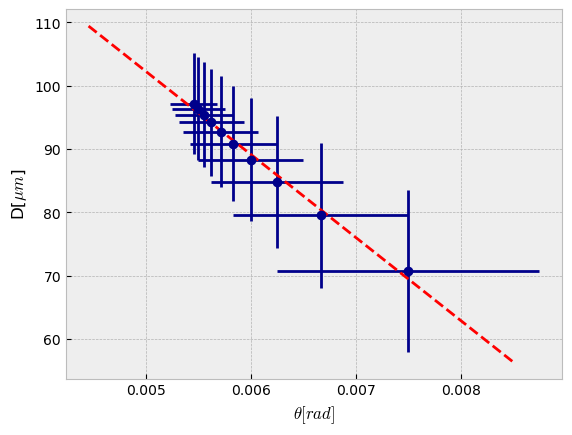

In [4]:
def recta(x,A,B):
    return A*x + B

ajuste_recta_1 = curve_fit(recta, ang_1, g_1)[0]
aa = np.linspace(ang_1.min() - 0.001,ang_1.max() + 0.001,10**3)
def graf_V(A=1,B=1,aa=1):
    plt.errorbar(ang_1, g_1, xerr= err_ang_1, yerr=err_g_1, fmt = "o", color = "darkblue",ecolor = "darkblue")
    plt.plot(aa, recta(aa, A,B), color="red", ls="--")
    plt.ylabel(r"D[$\mu m$]")
    plt.xlabel(r"$\theta [rad]$")
    plt.grid(True)
    res_1 = g_1 - recta(ang_1, ajuste_recta_1[0], ajuste_recta_1[1])
    st_1 = np.sum((g_1 - np.mean(g_1))**2)
    sr_1 = np.sum(res_1**2)
    r2_1 = (st_1 - sr_1)/st_1
    print("Coef de determinación:",r2_1)
graf_V(ajuste_recta_1[0], ajuste_recta_1[1], aa)
#plt.savefig("Pelo_1.pdf")

In [5]:
promedio_1 = np.mean(g_1)
err_promedio_1 = np.sqrt(np.sum((err_g_1)**2)) / len(err_g_1)
print("El grosor del pelo 1 en micrómetros es:", promedio_1, "+-", err_promedio_1)

El grosor del pelo 1 en micrómetros es: 89.00755942986535 +- 3.0411979898813706


Text(0.5, 0, '$\\theta$')

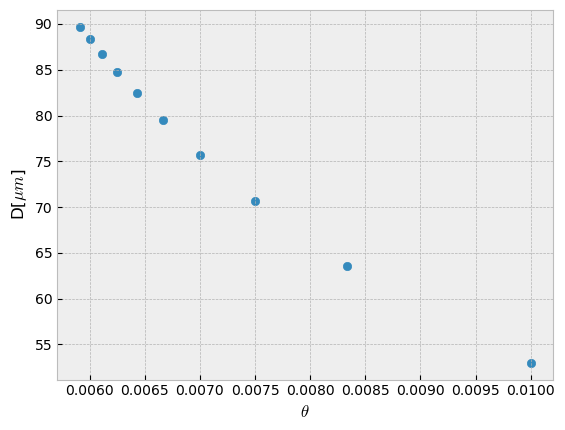

In [6]:
# PELO 2
d_2 = np.array([220, 200, 180, 160, 140, 120, 100, 80, 60, 40])*0.01 #en metros
L_2 = np.array([1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4])*0.01 #en metros

#Ángulos PELO 1
ang_2 = np.arctan(L_2/d_2)
v = 1/(1 + (L_2/d_2)**2)
err_ang_2 = np.sqrt((v*L_2/d_2**2)**2  *  0.5E-3**2 + (v*1/d_2)**2 *  0.5E-3**2 )

# GROSOR PELO 1
g_2 = 530/np.sin(ang_2) * 0.001 #micrometros
err_g_2 = np.sqrt((1/np.sin(ang_2)*37.5)**2 + (530*np.cos(ang_2)/np.sin(ang_2)**2 * err_ang_2)**2) * 0.001 #micrometros

#Gráfico ángulos vs Distancias
plt.scatter(ang_2, g_2)
plt.ylabel(r"D[$\mu m$]")
plt.xlabel(r"$\theta$")
#plt.xticks([ang_1[0], ang_1[7], ang_1[9]], [0.0054, 0.0062, 0.0074])

Coef de determinación: 0.9912828908010275


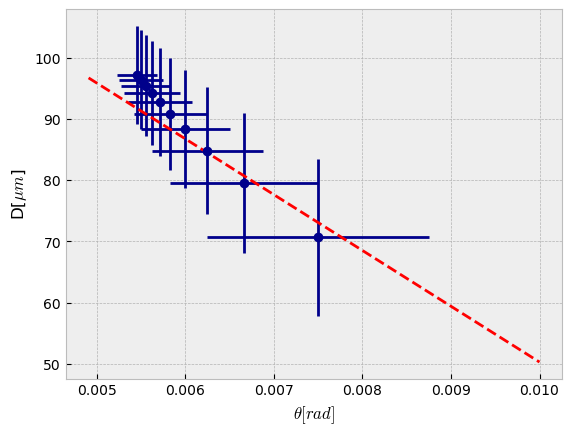

In [7]:
ajuste_recta_2 = curve_fit(recta, ang_2, g_2)[0]
bb = np.linspace(ang_2.min() - 0.001,ang_2.max(),10**3)
graf_V(ajuste_recta_2[0], ajuste_recta_2[1], bb)
#plt.savefig("Pelo_2.pdf")

In [8]:
promedio_2 = np.mean(g_2)
err_promedio_2 = np.sqrt(np.sum((err_g_2)**2)) / len(err_g_2)
print("El grosor del pelo 2 en micrómetros es:", promedio_2, "+-", err_promedio_2)

El grosor del pelo 2 en micrómetros es: 77.44969130015166 +- 2.3655544011956713


In [9]:
print(ang_2)
print(err_ang_2)
print(g_2)
print(err_g_2)

[0.00590902 0.00599993 0.00611104 0.00624992 0.00642848 0.00666657
 0.00699989 0.00749986 0.00833314 0.00999967]
[0.00022727 0.00025    0.00027777 0.00031249 0.00035714 0.00041666
 0.00049999 0.00062498 0.0008333  0.00124994]
[89.69387359 88.33492332 86.72889216 84.80165623 82.446148   79.50176665
 75.71614069 70.66865414 63.60220829 53.00264993]
[7.22326336 7.25330238 7.29362062 7.34704065 7.41672743 7.50536527
 7.61239882 7.72531026 7.79108505 7.61278735]


In [19]:
error_relativo_1 = np.abs((promedio_1 - promedio_2)/promedio_2)*100 
error_relativo_2 = np.abs((promedio_2 - promedio_1)/promedio_1)*100
print(error_relativo_1, error_relativo_2)

14.923065457965311 12.985265750175824


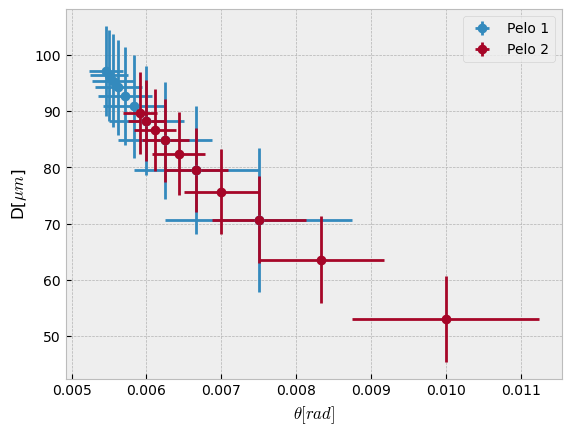

In [17]:
plt.errorbar(ang_1, g_1, xerr= err_ang_1, yerr=err_g_1, fmt = "o", label = "Pelo 1")
plt.errorbar(ang_2, g_2, xerr= err_ang_2, yerr=err_g_2, fmt = "o", label = "Pelo 2")
#plt.plot(aa, recta(aa, ajuste_recta_1[0],ajuste_recta_1[1]), ls="--")
#plt.plot(bb, recta(bb, ajuste_recta_2[0],ajuste_recta_2[1]),  ls="--")
plt.ylabel(r"D[$\mu m$]")
plt.xlabel(r"$\theta [rad]$")
plt.grid(True)
res_1 = g_1 - recta(ang_1, ajuste_recta_1[0], ajuste_recta_1[1])
st_1 = np.sum((g_1 - np.mean(g_1))**2)
sr_1 = np.sum(res_1**2)
r2_1 = (st_1 - sr_1)/st_1
plt.legend()